# ELE510 Image Processing with robot vision: LAB, Exercise 7, Stereo Vision and Camera Calibration.

## Problem 1 (Correspondence problem) 

![stereocamera.png](images/stereocamera.png)

Assume that we have a simple stereo system as shown in the figure. **L** and **R** denotes the focal point of the Left and Right camera respectively.  ${\mathbf P}$ is a point in the 3D world, and ${\mathbf p}$ in the 2D image plane. $^{\small L}{\mathbf P_w}$ denotes a world point with reference to the focal point of the Left camera.  
The baseline (line between the two optical centers) is $T = 5\,\text{cm}$ and the focal length $f = 5\,\text{cm}$. 

**a)** Consider the scene point $^{\small L}{\mathbf P_w} = [0.05\text{m},0,10\text{m}]^{T}$. Suppose that due to various errors, the image coordinate $x_{l}$ is 2% **bigger** than its true value, while the image coordinate $x_{r}$ is perfect. What is the error in depth $z_w$, in millimeters (round up to three decimals)?

**b)** An image of resolution $500\times500$ pixels is seen by the Left and Right cameras. The image sensor size is $10\text{mm} \times 10\text{mm}$.  Let the disparity in the image coordinates be up to $25$ pixels. Using the same focal point and baseline, what is the depth of the image compare to the cameras?

**c)** Can you explain with your own words the stereo ordering constraint? What is the definition of forbidden zone in this scenario?



**a)** Error in Depth Calculation:**

To calculate the error in depth, we first need to find the true and erroneous image coordinates in the left camera image plane. We are given that the image coordinate $x_l$ is 2% bigger than its true value. Let's calculate the true and erroneous image coordinates:

True image coordinate in left camera, $x_l$:  
$x_l = \frac{f \cdot X_l}{Z_l} = \frac{0.05\,m \cdot 0.05\,m}{10\,m} = 0.00025\,m$

Erroneous image coordinate in left camera, $x_l'$ (2% bigger):  
$x_l' = 1.02 \cdot x_l = 1.02 \cdot 0.00025\,m = 0.000255\,m$

Now, we can calculate the depth error:

Depth error, $\Delta z_w$:  
$\Delta z_w = Zl-\frac{f \cdot X_w}{x_l'} = 10\,m- \frac{0.05\,m \cdot 0.05\,m}{0.0000255\,m} \approx 0.0019607843 \,m$

$\Delta z_w \approx 1.961\,mm$


In [30]:
x_sensor = 500
y_sensor = 500
x_mm = 10
y_mm = 10
delta = 25

#rateo between mm and pixel
rateo = x_sensor/x_mm
print("rateo: ", rateo)

#delta to mm
delta_mm = delta/rateo
print("delta_mm: ", delta_mm)

zw = (f*T)/(delta_mm)
print("zw: ", zw)

rateo:  50.0
delta_mm:  0.5
zw:  5000.0


**b) Depth of Image Relative to Cameras:**
First we need to find the disparity, $d$, in millimeters by using the sensor dimension and the pixel number:


$rateo = \frac{500\,px}{10\,mm} = 50\,\frac{px}{mm}$

since the sensor is square, we can use the same rateo for both dimensions. Now we need to calculate the disparity in mm:

$d = 25\,px \cdot \frac{1\,mm}{50\,px} = 0.5\,mm$

Using the disparity and other known parameters, we can calculate the depth $z_w$ relative to the cameras:

$z_w = \frac{f \cdot T}{d}$

$z_w = \frac{0.05\,m \cdot 0.05\,m}{0.5} = 5000\,mm$


So, the depth of the image relative to the cameras is 5m.

**c) Stereo Ordering Constraint and Forbidden Zone:**

The stereo ordering constraint, in the context of stereo vision, refers to the requirement that objects in the 3D world should be reconstructed correctly in the stereo images so that their relative depth is preserved. In other words, objects closer to the cameras in the 3D scene should appear closer in the stereo images.

The forbidden zone in stereo vision is a region in the disparity map where it's impossible to find a valid depth estimate for certain image points. It occurs when the disparity between the left and right images cannot be determined accurately. The forbidden zone typically occurs in the areas where the corresponding points in the two images cannot be matched reliably due to occlusions or other factors.

In this scenario, the forbidden zone would likely occur for objects that are very close to the cameras, as the disparity between the left and right images becomes too small to accurately estimate depth. Beyond a certain range, the disparity becomes too large, and the depth estimation also becomes unreliable. The stereo ordering constraint ensures that points within a certain range can be accurately reconstructed, while points outside that range may fall into the forbidden zone where depth estimation is problematic.

## Problem 2 (Block Matching)

The simplest algorithm to compute dense correspondence between a pair of stereo images is **block matching**.
Block matching is an *area-based* approach that relies upon a statistical correlation between local intensity regions.

For each pixel (x,y) in the left image, the right image is searched for the best match among all possible disparities $0 \le d \le d_{\text{max}}$.

**a)** Use the function `cv2.StereoBM_create(numDisparities=0, blockSize=21)` ([Documentation](https://docs.opencv.org/master/d9/dba/classcv_1_1StereoBM.html)) 
([Class Documentation](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#stereobm))
to computing stereo correspondence using the block matching algorithm. 

Find the disparity map between the following images: **./images/aloeL.jpg** and **./image/aloeR.jpg**.


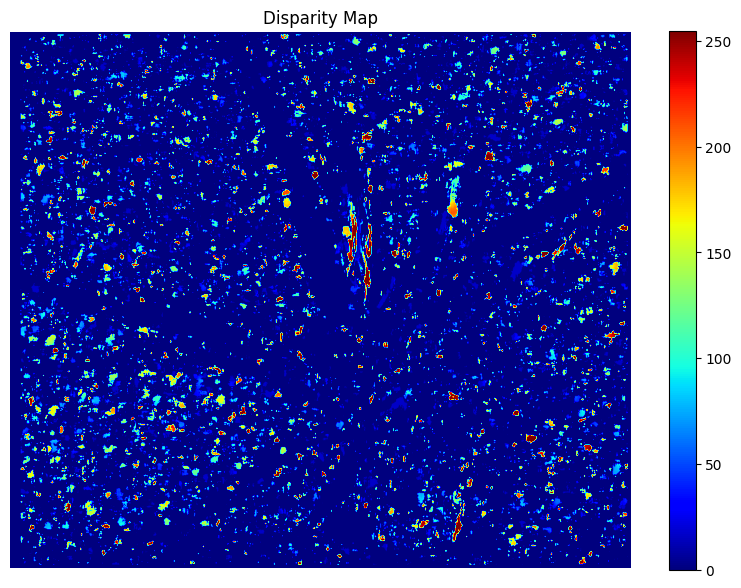

In [31]:
import cv2
import matplotlib.pyplot as plt

# Load the left and right images
left_image = cv2.imread('./images/aloeL.jpg', 0)
right_image = cv2.imread('./images/aloeR.jpg', 0)

# Create a StereoBM object
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)  # You can adjust the parameters as needed

# Compute the disparity map
disparity_map = stereo.compute(left_image, right_image)

# Normalize the disparity map for visualization
disparity_map = cv2.normalize(disparity_map, disparity_map, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the disparity map using Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(disparity_map, cmap='jet')
plt.colorbar()
plt.title('Disparity Map')
plt.axis('off')
plt.show()


**b)** What happens if you increase the `numDisparities` parameter in the `cv2.StereoBM_create()`? And if you change the `blockSize` parameter?  

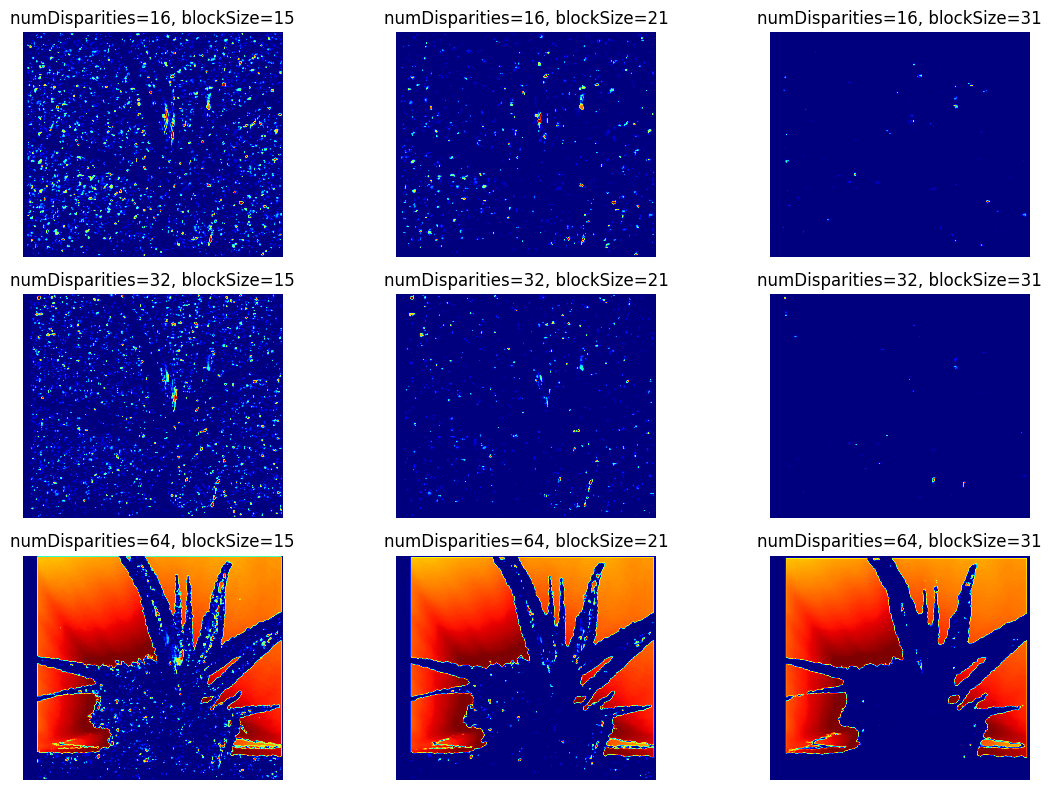

In [32]:
# Create a list of parameter values to test
num_disparities_values = [16, 32, 64]  # Vary the numDisparities parameter
block_size_values = [15, 21, 31]      # Vary the blockSize parameter

# Create subplots for displaying the disparity maps
fig, axes = plt.subplots(len(num_disparities_values), len(block_size_values), figsize=(12, 8))

for i, num_disparities in enumerate(num_disparities_values):
    for j, block_size in enumerate(block_size_values):
        # Create a StereoBM object with the current parameters
        stereo = cv2.StereoBM_create(numDisparities=num_disparities, blockSize=block_size)
        
        # Compute the disparity map
        disparity_map = stereo.compute(left_image, right_image)
        
        # Normalize the disparity map for visualization
        disparity_map = cv2.normalize(disparity_map, disparity_map, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        
        # Display the disparity map in the subplot
        axes[i, j].imshow(disparity_map, cmap='jet')
        axes[i, j].set_title(f'numDisparities={num_disparities}, blockSize={block_size}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

- numDisparities specifies the maximum disparity search range for stereo correspondence. Disparity refers to the difference in horizontal pixel coordinates between corresponding points in the left and right images. It indicates how much a point in the left image has shifted horizontally to align with the corresponding point in the right image.
A larger numDisparities value increases the range over which disparities are searched. This can be useful when dealing with scenes where objects are at varying distances from the camera. However, it can also increase computation time.
Smaller values are suitable for scenes with objects at a similar depth.

- The blockSize parameter defines the size of the pixel neighborhood used for matching. It represents the size of the square window (in pixels) around each pixel in the left image that is compared to corresponding regions in the right image.
A larger blockSize considers more neighboring pixels in the matching process. A larger window can provide more stable disparity values, especially in areas with textureless or repetitive patterns. However, it may result in a lower resolution disparity map.
Smaller blockSize values may capture finer details but could be more sensitive to noise or texture variations.

## Problem 3 (Camera calibration)

Calibrate the camera using a set of checkerboard images (you can find them in *./images/left??.jpg*), where `??` indicates the index of the image 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>
<div class="alert alert-block alert-info">
Use the following lines to get the entire list of the images to process:
    
```python
from glob import glob

img_names = glob('./images/left??.jpg')
```
    
</div>
</details>


**a)** Use the checkerboard images to find the feature points using the openCV `cv2.findChessboardCorners()` function ([Documentation](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga93efa9b0aa890de240ca32b11253dd4a)).

Normally, we have talked about camera calibration as a method to know the intrinsic parameters of the camera, here we want to use the camera matrix and the relative distortion coefficients to undistort the previous images.
For a detailed explanation of distortion, read section 13.4.9 of the text book [1].

**b)** Calibrate the camera using the feature points discovered in **a)** and find the relative camera matrix and distortion coefficients using `cv2.calibrateCamera()` function ([Documentation](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga3207604e4b1a1758aa66acb6ed5aa65d)).

**P.S.:**   
By default, you should find 5 distortion coeffiencients (3 radial distortion coeff. ($k_1, k_2, k_3$) and 2 tangential coeff. ($p_1,p_2$)); these values are used later to find a new camera matrix and to undistort the images.    

**c)** Using the camera matrix and distortion coefficients, transform the images to compensate any kind of distortion using 
 `cv2.getOptimalNewCameraMatrix()` ([Documentation](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga7a6c4e032c97f03ba747966e6ad862b1)) and `cv2.undistort()` ([Documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga69f2545a8b62a6b0fc2ee060dc30559d)).
 
 

In [33]:
# a)
# Function to find the feature points using cv2.findChessboardCorners(...)
# If the function finds the corners, return them, otherwise return None  
def findCorners(filename, pattern_size):
    img = cv2.imread(filename, 0)
    # Find the corners on the chessboard
    found, corners = cv2.findChessboardCorners(img, pattern_size)

    if not found: return None
    
    return corners.reshape(-1, 2)

In [42]:
# b)
# Function to calibrate the camera.
# Return the camera matrix and the distortion coeffiecients (radial & tangential)
def calibrateTheCamera(obj_points, img_points, img_shape):
    # Create a list of object points (pattern points) for each image
    obj_points = [obj_points] * len(img_points)

    # Calibrate the camera and return the camera matrix and distortion coefficients
    _, camera_matrix, dist_coeffs, _, _ = cv2.calibrateCamera(obj_points, img_points, img_shape[::-1], None, None)

    return camera_matrix, dist_coeffs

In [43]:
# c)
# Function that undistort the images using cv2.getOptimalNewCameraMatrix(...) and cv2.undistort(...)
# Plot the new undistorted images.
def undistortImage(filename, camera_matrix, dist_coefs):
    
    img = cv2.imread(filename,0)
    h, w = img.shape[:2]

    # Returns the new camera intrinsic matrix based on the camera matrix and the distortion coefficients
    new_camera_matrix, _ = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w, h), 1, (w, h))

    # Transforms an image to compensate for lens distortion using the camera matrix,
    # the distortion coefficients, and the camera matrix of the distorted image.
    undistorted_img = cv2.undistort(img, camera_matrix, dist_coefs, None, new_camera_matrix)

    plt.figure(figsize=(10, 10))
    plt.imshow(undistorted_img, cmap='gray')
    plt.title('Undistorted Image')
    plt.axis('off')
    plt.show()

In [45]:
import numpy as np
from glob import glob

obj_points = []
img_points = []
img_names = glob('./images/*.jpg')


# From the documentation of cv2.findChessboardCorners:
# patternSize – Number of inner corners per a chessboard row and column
#( patternSize = cvSize(points_per_row,points_per_colum) = cvSize(columns,rows) ).
pattern_size = (9,6)

# Defining the world coordinates for 3D points
pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= 1

#### a)
# Find feature points with checkerboard images.
chessboards = [findCorners(filename, pattern_size) for filename in img_names]
for corners in [chessboard for chessboard in chessboards if chessboard is not None]:
    img_points.append(corners)
    obj_points.append(pattern_points)

#### b)
# Get the camera matrix and the distortion coeffiecients (radial & tangential).
img_shape = cv2.imread(img_names[0], cv2.IMREAD_GRAYSCALE).shape[:2]
camera_matrix, dist_coefs = calibrateTheCamera(obj_points, img_points, img_shape)

#### c) 
# Undistort the images and plot them.
for filename in img_names:
    undistortImage(filename, camera_matrix, dist_coefs)
    

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'calibrateCamera'
> Overload resolution failed:
>  - Can't parse 'objectPoints'. Sequence item with index 0 has a wrong type
>  - Can't parse 'objectPoints'. Sequence item with index 0 has a wrong type



### Delivery (dead line) on CANVAS: 21.10.2022 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.